## Background Information

Below information is taken from the README doc in the project brief.

The dataset is composed of features computed from a digitised image of a fine needle aspirate (FNA) of a breast mass. They describe the characteristics of cell nuclei present in the image.

The dataset contains 569 records (images).

Each record has 32 attributes. These include ID number, diagnosis (B = benign and M = malignant) and 30 real-valued input features.

10 different features are recorded, but there are three columns for each feature (mean, standard error and worst), hence resulting in the 30 remaining columns.

The 'worst' value is the mean of the three largest values for that feature.

The features recorded are:
* radius (mean of distances from center to points on the perimeter)
* texture (standard deviation of gray-scale values)
* perimeter
* area
* smoothness (local variation in radius lengths)
* compactness (perimeter^2 / area - 1.0)
* concavity (severity of concave portions of the contour)
* concave points (number of concave portions of the contour)
* symmetry
* fractal dimension ("coastline approximation" - 1)

All features are recorded to four significant figures.

The class distribution is 357 benign, 212 malignant. This is relatively balanced a ratio of approx. 2:1 benign to malignant). 

## Importing Relevant Libraries

Libraries of interest are pandas, numpy, os, matplotlib and seaborn.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Will also be importing sklearn functions as we go.

## Data Exploration and Preparation

### Looking at the data

In [2]:
# load in the raw data csv file
raw_data = pd.read_csv("C:/Users/alsaw/OneDrive/Documents/2019-20 post India/Coding/CFG - python/Final Project/Team2_final_project/Data/Raw/raw_data.csv")

In [3]:
# have a look at the head
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
# have a look at the tail
raw_data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
# describe the data
raw_data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
# get data info
raw_data.info()

# can see that we have 569 records, which we know is true
# can see there are 33 columns but we expected 32; weird column at the end 'Unnamed:32' with no data in
# can see that our data types are mostly float, except id (integer) and diagnosis (string)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [7]:
# check class distribution
# count number of benign records
raw_data.loc[raw_data.diagnosis == "B", "diagnosis"].count()

# correct

357

In [8]:
# check class distribution
# count number of malignant records
raw_data.loc[raw_data.diagnosis == "M", "diagnosis"].count()

# correct

212

In [9]:
# check for missing values, represented by NaN
raw_data.isnull().values.any()

# telling us we have null values
# suspect the null values are in the 'Unnamed:32' column

True

In [1]:
# counting null values
raw_data.isnull().sum()

# showing 'Unnamed:32' column is the problem

NameError: name 'raw_data' is not defined

In [11]:
# removing 'Unnamed:32' as it holds no data (didn't expect to have it in there anyway, dunno what happened)
data_minus_unnamed = raw_data.drop("Unnamed: 32", axis=1)

In [12]:
# let's check that worked
data_minus_unnamed.head()

# now we have what we expected

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [13]:
# save new data version to Interim data folder
data_minus_unnamed.to_csv("C:/Users/alsaw/OneDrive/Documents/2019-20 post India/Coding/CFG - python/Final Project/Team2_final_project/Data/Interim/data_minus_unnamed.csv")

In [14]:
# check for values of '0' cos they might be errors
data_minus_unnamed[data_minus_unnamed == 0].count()

# 13 records have 0s for concavity attributes
# possible those nuclei do not have any concave points (rather than that the data is missing)
# leave values as they are for now and investigate further

id                          0
diagnosis                   0
radius_mean                 0
texture_mean                0
perimeter_mean              0
area_mean                   0
smoothness_mean             0
compactness_mean            0
concavity_mean             13
concave points_mean        13
symmetry_mean               0
fractal_dimension_mean      0
radius_se                   0
texture_se                  0
perimeter_se                0
area_se                     0
smoothness_se               0
compactness_se              0
concavity_se               13
concave points_se          13
symmetry_se                 0
fractal_dimension_se        0
radius_worst                0
texture_worst               0
perimeter_worst             0
area_worst                  0
smoothness_worst            0
compactness_worst           0
concavity_worst            13
concave points_worst       13
symmetry_worst              0
fractal_dimension_worst     0
dtype: int64

### Converting data types

ID number is currently integer data. However, as it is effectively a name, can be changed to string data so as not to affect analyses.

In [15]:
# change ID to string data
data_minus_unnamed["id"] = data_minus_unnamed["id"].astype(str)

In [16]:
# check that worked
data_minus_unnamed.dtypes

# it did, 'id' is now object data

id                          object
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [17]:
# save new data version to Interim data folder
# given it a new file name of 'data_minus_unnamed.csv'
data_minus_unnamed.to_csv("C:/Users/alsaw/OneDrive/Documents/2019-20 post India/Coding/CFG - python/Final Project/Team2_final_project/Data/Interim/data_minus_unnamed_v2.csv")

Our target variable is diagnosis, which is currently categorical (B or M). Need to change it to numerical data in order to perform analysis.

Going to one hot encode diagnosis as this will give a neutral representation of the data (i.e. does not assign an order).

In [18]:
# Step 1, encode 'diagnosis' and drop reference column
one_hot_diagnosis = pd.get_dummies(data_minus_unnamed["diagnosis"], drop_first=True)

# Step 2, drop original 'diagnosis' from dataset
data_minus_diagnosis = data_minus_unnamed.drop("diagnosis", axis=1)

# Step 3, add new one hot encoded column to original dataset
data_plus_encoded_diagnosis = data_minus_diagnosis.join(one_hot_diagnosis)

In [19]:
# check that it worked
data_plus_encoded_diagnosis.shape

# correct number of records and attributes

(569, 32)

In [20]:
# another check
data_plus_encoded_diagnosis.head()

# can see encoded diagnosis column been named 'M'

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,M
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [21]:
# change column M's name to something more intuitive
data_plus_encoded_diagnosis.rename(columns={'M':'one_hot_diagnosis'}, inplace=True)

In [22]:
# check it worked
data_plus_encoded_diagnosis.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,one_hot_diagnosis
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [23]:
# save new data version to Interim data folder
data_plus_encoded_diagnosis.to_csv("C:/Users/alsaw/OneDrive/Documents/2019-20 post India/Coding/CFG - python/Final Project/Team2_final_project/Data/Interim/data_with_encoded_diagnosis.csv")

### Visualisation

**Target variable = diagnosis  
Predictor variables = everything else (except ID, obviously)**

As the dataset contains quite a lot of attributes, let's first do a correlation matrix to get a feel for the data. Then we can see which features are correlated to the target variable and explore these individually. 

Correlation matrices / heatmaps display Pearson's Product Moment Correlation Coefficient. This can range from 1 (perfect positive correlation) to -1 (perfect negative correlation). 

**Therefore, we are interested in features whose coefficients are nearest to 1 or -1.**

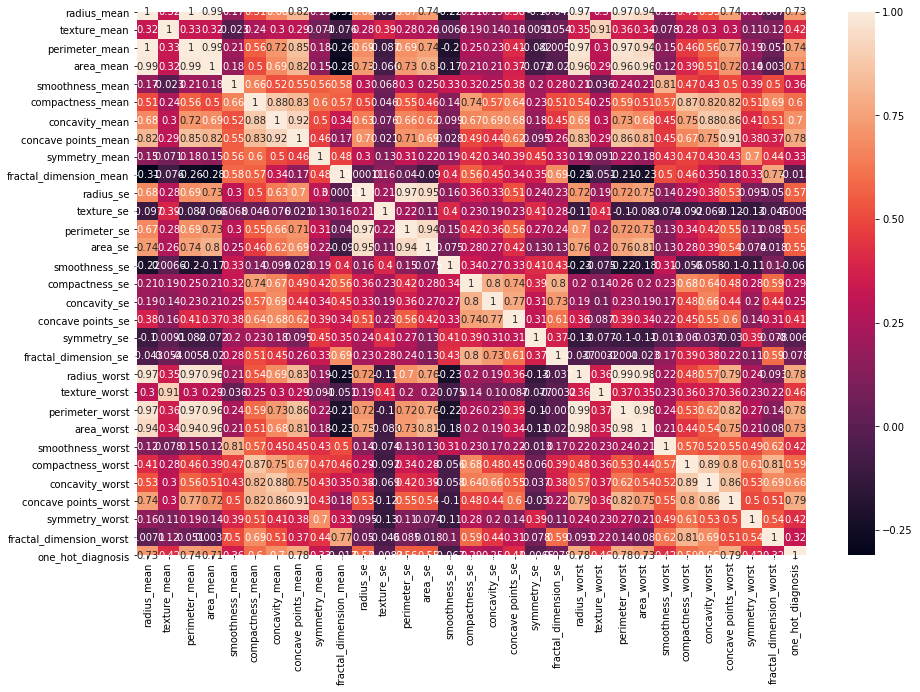

In [24]:
# plotting a correlation matrix
plt.figure(figsize = (15,10))
correlation_matrix = data_plus_encoded_diagnosis.corr()
# making it a heatmap with notation
sns.heatmap(data = correlation_matrix, annot = True)

From the heatmap, we can see which features are most correlated to one_hot_diagnosis. They are as follows:

Descending order from most to least correlated:
* concave points_worst, 0.79
* concave points_mean, 0.78
* radius_worst, 0.78
* perimeter_worst, 0.78
* area_worst, 0.78
* perimeter_mean, 0.74
* area_mean, 0.71
* radius_mean, 0.73
* concavity_mean, 0.7

As it seems that concave points / concavity is correlated to diagnosis, let's have another look at those 13 records in the dataset with 0s for features related to concavity.

In [25]:
# finding the 13 records with 0s for features relating to concavity
data_plus_encoded_diagnosis[data_plus_encoded_diagnosis.concavity_mean == 0]

# can see they are all records with benign diagnosis
# likely those 0s are actual values and not missing data
# especially as no other data is missing from those records

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,one_hot_diagnosis
101,862722,6.981,13.43,43.79,143.5,0.11700,0.07568,0.0,0.0,0.1930,...,19.54,50.41,185.2,0.15840,0.12020,0.0,0.0,0.2932,0.09382,0
140,868999,9.738,11.97,61.24,288.5,0.09250,0.04102,0.0,0.0,0.1903,...,14.10,66.53,342.9,0.12340,0.07204,0.0,0.0,0.3105,0.08151,0
174,871642,10.660,15.15,67.49,349.6,0.08792,0.04302,0.0,0.0,0.1928,...,19.20,73.20,408.3,0.10760,0.06791,0.0,0.0,0.2710,0.06164,0
175,872113,8.671,14.45,54.42,227.2,0.09138,0.04276,0.0,0.0,0.1722,...,17.04,58.36,259.2,0.11620,0.07057,0.0,0.0,0.2592,0.07848,0
192,875099,9.720,18.22,60.73,288.1,0.06950,0.02344,0.0,0.0,0.1653,...,20.83,62.25,303.8,0.07117,0.02729,0.0,0.0,0.1909,0.06559,0
314,894047,8.597,18.60,54.09,221.2,0.10740,0.05847,0.0,0.0,0.2163,...,22.44,56.65,240.1,0.13470,0.07767,0.0,0.0,0.3142,0.08116,0
391,903483,8.734,16.84,55.27,234.3,0.10390,0.07428,0.0,0.0,0.1985,...,22.80,64.01,317.0,0.14600,0.13100,0.0,0.0,0.2445,0.08865,0
473,9113846,12.270,29.97,77.42,465.4,0.07699,0.03398,0.0,0.0,0.1701,...,38.05,85.08,558.9,0.09422,0.05213,0.0,0.0,0.2409,0.06743,0
538,921092,7.729,25.49,47.98,178.8,0.08098,0.04878,0.0,0.0,0.1870,...,30.92,57.17,248.0,0.12560,0.08340,0.0,0.0,0.3058,0.09938,0
550,923748,10.860,21.48,68.51,360.5,0.07431,0.04227,0.0,0.0,0.1661,...,24.77,74.08,412.3,0.10010,0.07348,0.0,0.0,0.2458,0.06592,0


### Options for feature selection

Feature selection is when you identify key features of interest and drop the ones that are not useful.

There is more than one way of doing this, for example:
* **Handpicking** by using the correlation matrix above to identify features most correlated with target
* **Using PCA** to reduce the feature space

In [61]:
# creating a copy of the data with only handpicked features of interest
handpicked_predictors = data_plus_encoded_diagnosis[["one_hot_diagnosis","concave points_worst", "concave points_mean", "radius_worst", "perimeter_worst", "area_worst", "perimeter_mean", "area_mean", "radius_mean", "concavity_mean"]]

In [62]:
# saving it to csv
handpicked_predictors.to_csv("C:/Users/alsaw/OneDrive/Documents/2019-20 post India/Coding/CFG - python/Final Project/Team2_final_project/Data/Interim/handpicked_predictors.csv")

## Go to my other notebook!

#### Either Amber_model1_HPF_with_outliers (to see model with handpicked features) or Amber_model3_PCA_with_outliers (to see model where PCA reduces the feature space).